# Initialize Working Environment

Following the example here: [github](https://github.com/nmaloof/KaggleProject/blob/master/Ben%20-We're%20So%20Skewed.ipynb)

In [92]:
#install
#pip install --upgrade package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import norm
from scipy.stats import probplot #qqplot
import math
import statsmodels.api as sm

import seaborn as sns
sns.set() #initialize seaborn
from ggplot import *

In [21]:
%matplotlib inline 
#make sure graphs are displayed inline, magic function

In [25]:
#!ls
#%ls

In [372]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [8]:
?train.describe #desribe values

In [373]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
#select a subset of columns
#train[['YearBuilt','LotArea']].head(n=3)

In [374]:
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True) #inplace: modify the original dataframe

In [375]:
train_ID.to_csv('train_id.csv')
test_ID.to_csv('test_id.csv')

# Exploratory analysis

- Strange way to specify [colors](http://matplotlib.org/users/colors.html): for single color, one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
- Another example here [jointplot](http://alanpryorjr.com/visualizations/seaborn/jointplot/jointplot/)

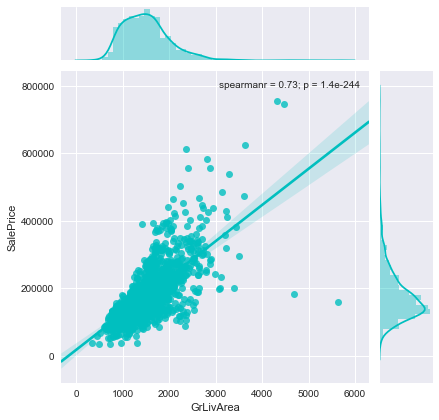

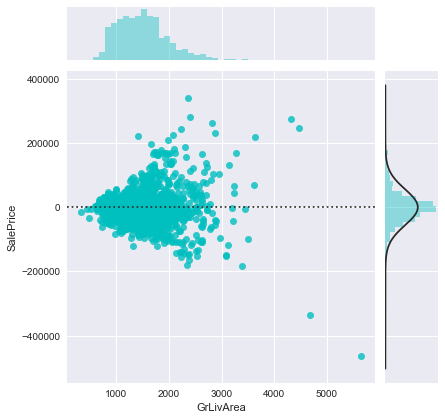

In [376]:
sns.jointplot(x="GrLivArea", y="SalePrice", 
              data=train, 
              kind="reg", #scatter | reg | resid | kde | hex 
              stat_func=spearmanr,
              color = 'c') #generate a stat function, here, correlation

sns.jointplot(x="GrLivArea", y="SalePrice", 
              data=train, 
              kind="resid", #scatter | reg | resid | kde | hex 
              stat_func=spearmanr,
              color = 'c') #generate a stat function, here, correlation

#resid: shows the residuals to the regression line
#very high heteroscedasticity, however residual normally distributed #

In [27]:
?sns.jointplot

In [55]:
#remove the two outliers w/ large sq footage but low sales price
train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index
train.query('GrLivArea > 4000 & SalePrice < 300000').index

Int64Index([523, 1298], dtype='int64')

In [57]:
train.shape

(1460, 80)

In [377]:
train = train.drop(train.query('GrLivArea > 4000 & SalePrice < 300000').index)

In [378]:
train.shape #drop two rows; drop can be used w/ indices

(1458, 80)

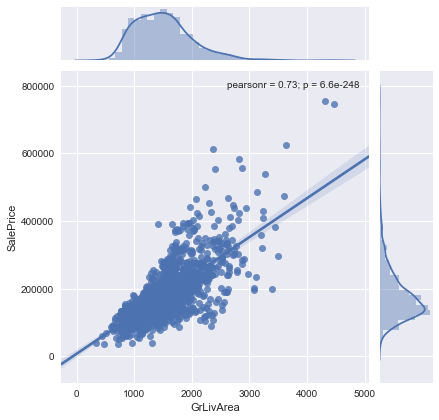

In [379]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train, kind="reg")

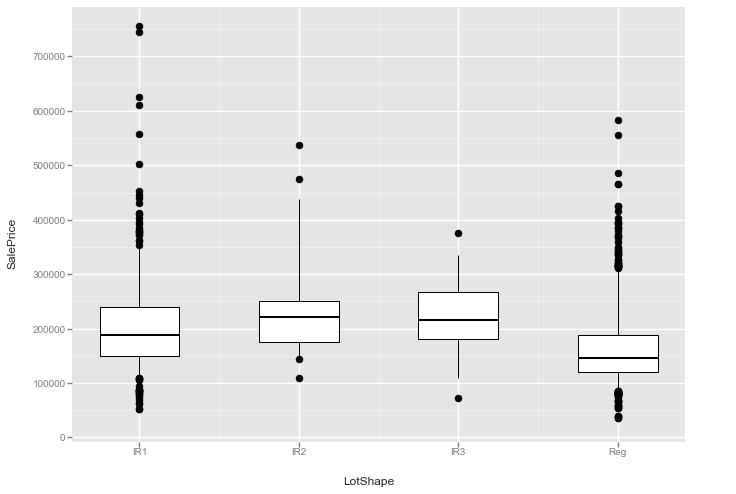

<ggplot: (7551720717)>

In [380]:
ggplot(aes(x='LotShape', y='SalePrice'), data=train) + geom_boxplot()
# + stat_smooth() #doesn't work currently due to errors with sort (pandas deprecated sort and replaced with sort_index ; sort_values)

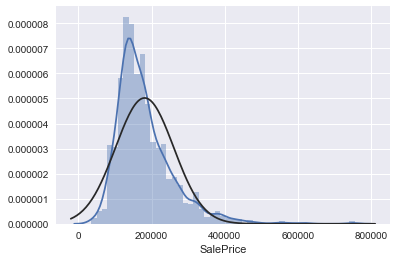

In [381]:
sns.distplot(train['SalePrice'], fit=norm) 
#fit a normal distribution; the fit doesn't look all that great due to the skewness
#?sns.distplot

In [82]:
#ggplot(aes(x='SalePrice'), data=train) + geom_density() #similar density plot in ggplot

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.259599766243, 180932.91906721535, 0.93201544928923674))

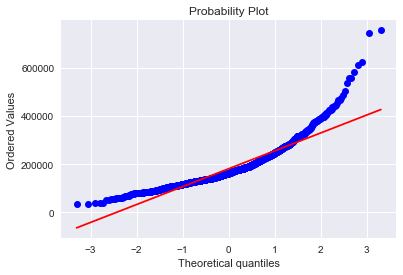

In [382]:
# QQ plot doesn't exist 
fig = plt.figure()
probplot(train['SalePrice'], plot=plt, dist='norm')

In [89]:
#use log1p and expm1 to do transformations

In [91]:
#?np.log1p expm1

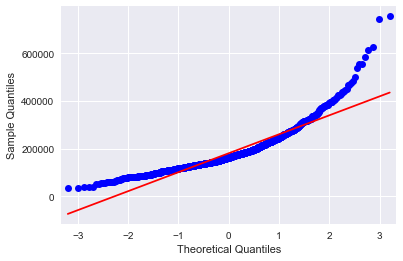

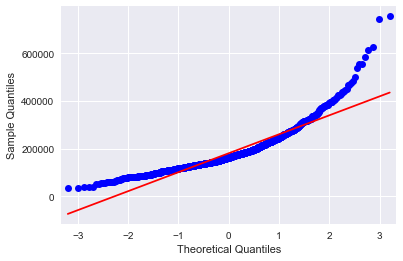

In [94]:
sm.qqplot(train['SalePrice'], line='s')

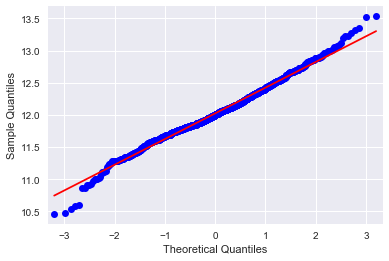

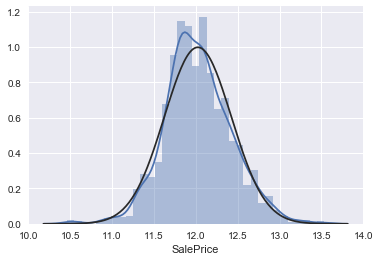

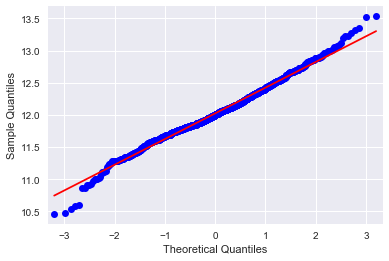

In [383]:
#target variable transformation
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'], fit=norm)
sm.qqplot(train['SalePrice'], line='s') #looks fine now, pretty perfect normal distribution

In [384]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values #extract numpy values
#merge train / test, but how would I know which is which? don't I need a 
data = pd.concat((train,test)).reset_index(drop=True) #remove old index and replace w/ integer ones
data.drop(['SalePrice'], axis=1, inplace=True) #remove target variable
print("data size is: {}".format(data.shape))

data size is: (2917, 79)


In [389]:
y_train

array([ 12.24769912,  12.10901644,  12.31717117, ...,  12.49313327,
        11.86446927,  11.90159023])

In [99]:
#interesting - merging the two and check whether train and test have significant discrepncies

# Missing Data

In [210]:
total = data.isnull().sum().sort_values(ascending=False) #missing by column
percent = (data.isnull().sum() / data.isnull().count() * 100.0).sort_values(ascending=False)

In [211]:
#pandas join is all using concat
?pd.concat

In [212]:
pd.concat([total, percent], join='inner', axis=1, keys=['Total', 'Percent']).head()

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151


In [213]:
#some features have a large # of missing values
#pandas Data Frame can join easily across
missing_data = percent.to_frame().rename(columns={0:'Percent'}).join(total.to_frame().rename(columns={0:'Total'}), how='inner')
missing_data.head()

,Percent,Total
PoolQC,99.691464,2908
MiscFeature,96.400411,2812
Alley,93.212204,2719
Fence,80.425094,2346
FireplaceQu,48.680151,1420


In [214]:
#######################################
missing_data.query('Percent > 0')

,Percent,Total
PoolQC,99.691464,2908
MiscFeature,96.400411,2812
Alley,93.212204,2719
Fence,80.425094,2346
FireplaceQu,48.680151,1420
LotFrontage,16.660953,486
GarageFinish,5.450806,159
GarageQual,5.450806,159
GarageYrBlt,5.450806,159
GarageCond,5.450806,159


In [215]:
#processing of missing values: need to check the data description
#################################################################

In [216]:
#NA means not applicable, which is also a valid data type

data["Alley"] = data["Alley"].fillna("None")
data['BsmtQual'] = data['BsmtQual'].fillna("None")
data['BsmtCond'] = data['BsmtCond'].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")

data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["GarageType"] = data["GarageType"].fillna("None")
data["GarageFinish"] = data["GarageFinish"].fillna("None")
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [217]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.query('Percent > 0')

,Total,Percent
LotFrontage,486,16.660953
GarageYrBlt,159,5.450806
MasVnrType,24,0.822763
MasVnrArea,23,0.788481
MSZoning,4,0.137127
Functional,2,0.068564
Utilities,2,0.068564
BsmtFullBath,2,0.068564
BsmtHalfBath,2,0.068564
TotalBsmtSF,1,0.034282


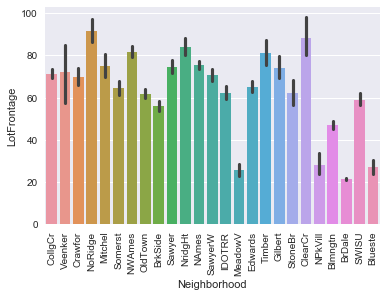

In [218]:
sns.barplot(x='Neighborhood',
            y='LotFrontage', 
            data=data, 
            estimator=np.mean) #error bar is plotted w/ mean anyway
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear() #what does this do

In [149]:
#?plt.gcf().clear #clear the current figure so the next one won't be drawn on top of this one

In [219]:
#?plt.xticks
?sns.distplot

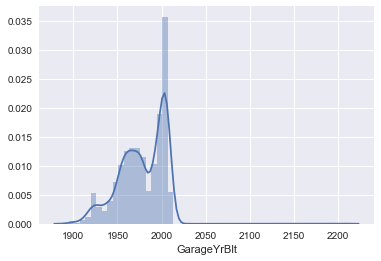

In [220]:
sns.distplot(data['GarageYrBlt'].dropna()) #there are some wrong values here

In [221]:
data['GarageYrBlt'].dropna().sort_values(ascending=False).head() #obs one outlier
#data.loc(data.query('GarageYrBlt > 2010'), 'GarageYrBlt') #= 2010 #set it to max

2590    2207.0
1606    2010.0
1500    2010.0
818     2010.0
986     2010.0
Name: GarageYrBlt, dtype: float64

In [222]:
data.loc[data['GarageYrBlt'] > 2010, 'GarageYrBlt'] = 2010 #set max to 2010

In [223]:
data.loc[data['GarageYrBlt'].isnull()][['GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()
#garage qual is ordinal; for year built, need a value that is distinct from all others for NAs

,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,None,0.0,0.0,None,None
48,NaN,None,0.0,0.0,None,None
78,NaN,None,0.0,0.0,None,None
88,NaN,None,0.0,0.0,None,None
89,NaN,None,0.0,0.0,None,None


In [224]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [225]:
data.loc[data['GarageYrBlt'] == 0][['GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()
#garage qual is ordinal; for year built, need a value that is distinct from all others for NAs

,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,0.0,None,0.0,0.0,None,None
48,0.0,None,0.0,0.0,None,None
78,0.0,None,0.0,0.0,None,None
88,0.0,None,0.0,0.0,None,None
89,0.0,None,0.0,0.0,None,None


In [226]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x:x.fillna(x.median())#use mean will be similar
) #.head() #group by neighborhood and use median fill

In [228]:
data["LotFrontage"].head(n=10) #OK

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    80.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [230]:
data['LotFrontage'].isnull().sum()

0

In [231]:
#set the quantitative feature to 0 for basement w/ 0 type
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [232]:
## check other missing type

In [235]:
total = data.isnull().sum().sort_values(ascending=False) #missing by column
percent = (data.isnull().sum() / data.isnull().count() * 100.0).sort_values(ascending=False)
missing = pd.concat([total, percent], join='inner', axis=1, keys=['Total', 'Percent'])

In [240]:
missing.query('Percent > 0').sort_values(by = ['Total']) #inplace is false, this is the way to sort multile columns

,Total,Percent
Exterior1st,1,0.034282
GarageCars,1,0.034282
GarageArea,1,0.034282
SaleType,1,0.034282
KitchenQual,1,0.034282
Electrical,1,0.034282
Exterior2nd,1,0.034282
Utilities,2,0.068564
Functional,2,0.068564
MSZoning,4,0.137127


In [239]:
#Mason - probably set to None

,Total,Percent
MasVnrType,24,0.822763
MasVnrArea,23,0.788481
MSZoning,4,0.137127
Utilities,2,0.068564
Functional,2,0.068564


In [244]:
#existing: None = 0.0 area, use current one
data.query("MasVnrType=='None'")[['MasVnrType','MasVnrArea']].head()

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0


In [246]:
#NA fill
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [247]:
#fill in the most common type of categorical variable for common zoning 
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

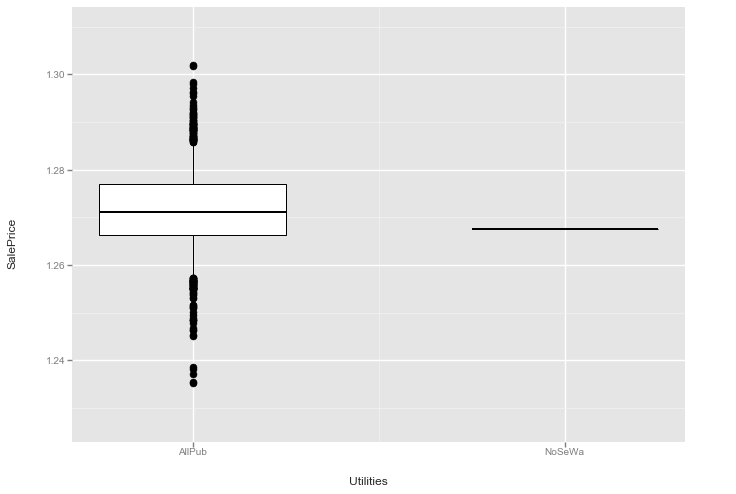

<ggplot: (7547788521)>

In [252]:
#why drop ulitilies?
ggplot(aes(x='Utilities',y='SalePrice'), data=train) + geom_boxplot()

In [257]:
data['Utilities'].value_counts() #well, that's why, this is a zero variance column

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [274]:
#need to find a way to select categorical variables; 
def mode_ratio(d, c):
    x = d[c]
    z = x.value_counts().sort_values(ascending=False)
    return z[0] * 1.0 / z[1]

#data['Utilities'].value_counts().sort_values(ascending=False)[0]
mode_ratio(data, 'Utilities')

2914.0

In [275]:
#
dx = {'column':[],'ratio':[]}
for i,v in enumerate(data.columns.values):
    if data.dtypes[i] == 'object':
        #print i,v
        #print i,v,mode_ratio(data, v)
        dx['column'].append(v)
        dx['ratio'].append(mode_ratio(data, v))

#ratio between the most frequent class the second most frequent class
print pd.DataFrame.from_dict(dx).sort_values(by=['ratio'], ascending=False)

           column        ratio
42      Utilities  2914.000000
36         PoolQC   727.000000
41         Street   242.083333
9      Condition2   222.153846
37       RoofMatl   125.000000
23        Heating   106.370370
18     Functional    38.785714
33    MiscFeature    29.600000
5    BsmtFinType2    23.723810
0           Alley    22.658333
28      LandSlope    22.208000
27    LandContour    21.850000
2        BsmtCond    21.344262
19     GarageCond    16.679245
21     GarageQual    16.364780
8      Condition1    15.404908
10     Electrical    14.196809
7      CentralAir    13.882653
35     PavedDrive    12.217593
1        BldgType    10.674009
40       SaleType    10.654008
39  SaleCondition     9.884774
11      ExterCond     8.481605
15          Fence     7.130699
31       MSZoning     4.928261
3    BsmtExposure     4.555024
38      RoofStyle     4.207650
29      LotConfig     4.180392
13    Exterior1st     2.277778
14    Exterior2nd     2.268456
22     GarageType     2.210526
32     M

In [276]:
data.drop(['Utilities'], axis=1, inplace=True)

In [281]:
data['Functional'].mode()[0]

'Typ'

In [284]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

In [286]:
#data['Functional'].isnull().sum() #attempting to use an object to fill will result in 0

In [287]:
data['GarageCars'] = data['GarageCars'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)

In [288]:
#Use mode to NA fill the rest of the categorical variables 
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [289]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

In [291]:
data['Functional'].isnull().sum()

0

In [293]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count() * 100.0).sort_values(ascending=False)
missing = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing.head()

,Total,Percent
YrSold,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior1st,0,0.0


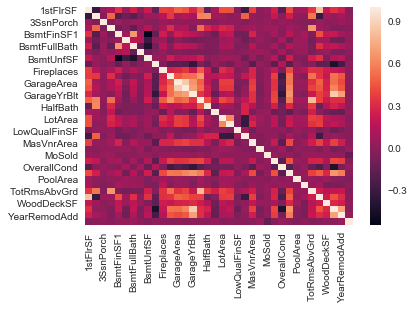

In [296]:
#All missing values - taken care of!
#nice, automatically shows
sns.heatmap(data.corr(method='spearman'))
#data.corr()

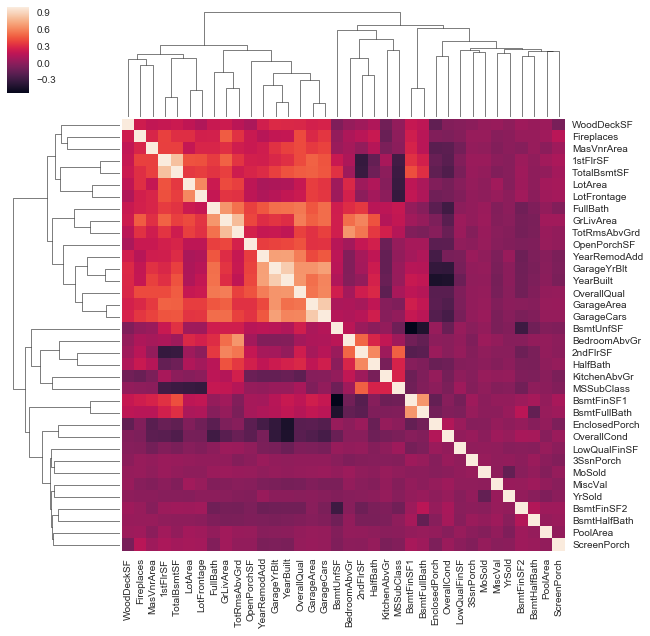

In [297]:
sns.clustermap(data.corr(method='spearman'))

In [299]:
data.to_csv("./merged_no_label.csv", index=False)

In [390]:
#did labels
pd.DataFrame.from_dict({'y_train':y_train}).to_csv("./y_train.csv", index=False)

In [305]:
#np.log1p #np.expm1

# Feature Engineering

In [ ]:
#theorectially some transformation such as Z is not suitable 

In [306]:
#data['OverallCond'].value_counts() #not run

5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [307]:
#data['OverallCond'] = data['OverallCond'].astype(str)

In [308]:
data['MSSubClass'].value_counts()

20     1079
60      573
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [309]:
##NOT RUN - I don't think it's necessary to discretize these varaibles
#data['YrSold'] = data['YrSold'].astype(str)
#data['MoSold'] = data['MoSold'].astype(str)
#data['OverallCond'] = data['OverallCond'].astype(str)
#data['MSSubClass'] = data['MSSubClass'].astype(str)

In [310]:
#total size; probably very correlated
data['OverallSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

In [311]:
data['BsmtQual'].value_counts()

TA      1283
Gd      1209
Ex       256
Fa        88
None      81
Name: BsmtQual, dtype: int64

In [314]:
(data['BsmtCond'] + data['BsmtQual']).value_counts()

TATA        1177
TAGd        1133
TAEx         232
NoneNone      79
FaTA          72
GdGd          66
TAFa          61
GdTA          31
GdEx          23
FaFa          22
FaGd           9
PoFa           3
GdFa           2
NoneTA         2
TANone         1
PoTA           1
FaNone         1
NoneGd         1
PoEx           1
dtype: int64

In [315]:
data['BsmnQual_BsmtCond'] = data['BsmtQual'] + data['BsmtCond']

In [325]:
data.loc[data['BsmnQual_BsmtCond'].str.contains('None'), 'BsmnQual_BsmtCond'] = 'None'

In [327]:
data['BsmnQual_BsmtCond'].value_counts() #not all that useful

TATA    1177
GdTA    1133
ExTA     232
None      84
TAFa      72
GdGd      66
FaTA      61
TAGd      31
ExGd      23
FaFa      22
GdFa       9
FaPo       3
FaGd       2
ExPo       1
TAPo       1
Name: BsmnQual_BsmtCond, dtype: int64

In [330]:
print((data['Condition1'] + data['Condition2']).value_counts())
data['Condition1_Condition2'] = data['Condition1'] + data['Condition2']

NormNorm        2511
FeedrNorm        154
ArteryNorm        89
RRAnNorm          41
PosNNorm          35
RRAeNorm          28
PosANorm          17
RRAnFeedr          8
RRNnNorm           7
RRNeNorm           6
FeedrFeedr         4
PosAPosA           3
PosNPosN           3
FeedrRRNn          2
ArteryArtery       2
ArteryPosA         1
RRAnArtery         1
FeedrRRAe          1
FeedrArtery        1
FeedrRRAn          1
RRNnFeedr          1
RRNnArtery         1
dtype: int64


In [331]:
(data['ExterQual'] + data['ExterCond']).value_counts()

TATA    1523
GdTA     900
TAGd     220
ExTA      99
GdGd      75
TAFa      47
FaFa      19
FaTA      14
TAEx       6
GdEx       3
ExGd       3
ExEx       3
TAPo       2
FaGd       1
GdFa       1
FaPo       1
dtype: int64

In [332]:
data['ExterQual_ExterCond'] = data['ExterQual'] + data['ExterCond']

In [333]:
#data['MoSold_YrSold'] = data['MoSold'] + data['YrSold'] #This is bad - this feature has no generalizability

In [338]:
(data['SaleType'] + data['SaleCondition']).value_counts()

WDNormal        2315
NewPartial       237
WDAbnorml        133
CODAbnorml        46
CODNormal         39
WDFamily          38
WDAlloca          24
ConLDNormal       21
WDAdjLand         12
CWDNormal         10
ConLwNormal        7
OthAbnorml         5
ConLINormal        5
ConNormal          4
WDPartial          4
ConLDAbnorml       3
ConLIAbnorml       2
CODFamily          2
ConLIFamily        2
ConLDFamily        1
ConPartial         1
OthNormal          1
OthFamily          1
ConLwFamily        1
ConLDPartial       1
CWDAbnorml         1
CWDFamily          1
dtype: int64

In [339]:
data['SaleType'].value_counts()

WD       2526
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [340]:
data['OverallCond'].value_counts()

5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [344]:
(data['SaleType'] + data['OverallCond'].astype(str)).value_counts() #use .str will not work

WD5       1333
WD6        488
WD7        377
New5       230
WD8        141
WD4         94
COD5        49
WD9         40
WD3         40
COD6        20
ConLD5      12
WD2          8
COD3         6
ConLI5       6
COD7         6
New6         6
WD1          5
CWD6         4
CWD7         4
CWD5         4
ConLD4       4
ConLw6       4
COD4         3
Oth6         3
ConLD7       3
Con5         3
ConLw5       3
Oth5         3
ConLI6       2
Con6         2
ConLD3       2
ConLD6       2
ConLw3       1
ConLD8       1
ConLI8       1
COD1         1
COD8         1
COD9         1
ConLD2       1
ConLD1       1
Oth3         1
New2         1
dtype: int64

In [346]:
#not a good feature - easily overfitting 
data['SaleType_OverallCond'] = data['SaleType'] + data['OverallCond'].astype(str)


According to the Data Documentation this is the breakdown on the Nominal and Ordinal Categories:

Nomial categories
"MSSubClass", MSZoning, "Street", "Alley", LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1, Exterior2, MasVnrType, MasVnrArea, Foundation, Heating, "CentralAir", GarageType, MiscFeature, SaleType, SaleCondition

Ordinal Categories
LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence
We learned to use One-Hot Encoding for linear models and label encoder for trees, but since i'm trying to use a mix of different models i'm going to use Label Encoding for the ordinal categories- categories where the order of the data might matter, then One-Hot Encoding for the nominal categories


In [348]:
#use label encoder - label encoding 
#this is nice, as LabelEncoder can automatically encode ordinal to number, as long as the strings are comparable!
from sklearn.preprocessing import LabelEncoder
category = ('LotShape', 'LandSlope', 'OverallCond', 'ExterQual', 'ExterCond', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
            'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'OverallCond', 
            'YrSold', 'MoSold', 'Street', 'Alley', 'CentralAir', 'MSSubClass')

In [349]:
lbl = LabelEncoder()
lbl.fit(data['LotShape'].values)

LabelEncoder()

In [350]:
lbl.classes_

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In [351]:
lbl.transform(['IR1', 'IR2', 'IR3', 'Reg']) #nice!

array([0, 1, 2, 3])

In [354]:
#transformation
for c in category:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values)) #use np.unique
    #break

In [355]:
data['GarageCond'].value_counts()

5    2652
3     159
1      74
2      15
4      14
0       3
Name: GarageCond, dtype: int64

In [358]:
data['YrSold'].value_counts() #Not much benefit to transform to categorical then back

1    691
3    647
2    621
0    619
4    339
Name: YrSold, dtype: int64

In [357]:
data['MoSold'].value_counts()

5     503
6     446
4     394
3     279
7     233
2     232
9     172
8     158
10    142
1     133
0     121
11    104
Name: MoSold, dtype: int64

In [360]:
#skewness spotcheck

In [359]:
numerical = data.dtypes[data.dtypes != "object"].index
skewed = data[numerical].apply(lambda x: x.skew()).sort_values()
skewed

PoolQC          -21.228518
Street          -15.502729
Functional       -4.056212
GarageYrBlt      -3.907257
GarageCond       -3.596139
CentralAir       -3.459334
GarageQual       -3.074369
BsmtFinType2     -3.044545
PavedDrive       -2.979273
BsmtCond         -2.862744
ExterCond        -2.497774
Fence            -1.993675
ExterQual        -1.800989
KitchenQual      -1.450560
BsmtExposure     -1.117896
Alley            -0.652041
LotShape         -0.618882
GarageFinish     -0.610267
YearBuilt        -0.599503
BsmtQual         -0.488614
YearRemodAdd     -0.450365
GarageCars       -0.219410
BsmtFinType1      0.083684
YrSold            0.132064
FullBath          0.165599
OverallQual       0.189688
MoSold            0.197447
GarageArea        0.216968
BedroomAbvGr      0.326736
FireplaceQu       0.332782
HeatingQC         0.485784
OverallCond       0.569607
BsmtFullBath      0.622735
TotalBsmtSF       0.672097
HalfBath          0.697024
Fireplaces        0.725651
MSSubClass        0.739214
T

In [361]:
#check this later boxcox1p (doesn't help the negative skewness)

In [364]:
#get dummy variables
data = pd.get_dummies(data) #on-hot encoding ALL!

In [363]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_OverallCond_Oth6,SaleType_OverallCond_WD1,SaleType_OverallCond_WD2,SaleType_OverallCond_WD3,SaleType_OverallCond_WD4,SaleType_OverallCond_WD5,SaleType_OverallCond_WD6,SaleType_OverallCond_WD7,SaleType_OverallCond_WD8,SaleType_OverallCond_WD9
0,856,854,0,1,3,4,3,706.0,0.0,2,...,0,0,0,0,0,1,0,0,0,0
1,1262,0,0,1,3,4,1,978.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,920,866,0,1,3,4,2,486.0,0.0,2,...,0,0,0,0,0,1,0,0,0,0
3,961,756,0,1,3,1,3,216.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,1145,1053,0,1,4,4,0,655.0,0.0,2,...,0,0,0,0,0,1,0,0,0,0


In [365]:
ntrain

1458

In [367]:
#numeric index maps directly
#so this is somewhat cheating - in reality we should not use test data for global transform
train_transformed = data[:ntrain]
test_transformed = data[ntrain:]

In [368]:
train_transformed.to_csv("./train_transformed.csv", index=False)
test_transformed.to_csv("./test_transformed.csv", index=False)

In [371]:
train_transformed.shape #315 columns

(1458, 315)